# Tensor Flow

## Imports

In [5]:
from scipy import misc
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import os
import cv2

## Setting fixed variables

In [2]:
data = "training_data/"

In [3]:
categories = ['Car','Dog']

In [4]:
img_size = 70

## Creating training data

In [10]:
training_data = []
for cat in categories:
    path = os.path.join(data,cat)
    class_num=categories.index(cat)
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array, (img_size,img_size))
            training_data.append([new_array, class_num])
        except:
            continue

#         plt.imshow(img_array, cmap="gray")
#         plt.show()
#         break
#     break

In [11]:
len(training_data)

16524

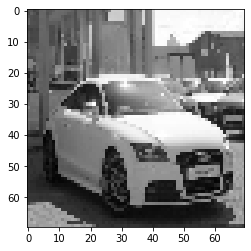

In [12]:
training_data[0][0]
plt.imshow(training_data[0][0], cmap="gray")
plt.show()

In [13]:
training_data[0][0]

array([[101, 104,  90, ..., 252, 255, 251],
       [ 96, 114, 101, ..., 253, 249, 247],
       [104,  99,  95, ..., 251, 245, 247],
       ...,
       [177, 149, 172, ..., 171, 160, 167],
       [175, 175, 187, ..., 174, 168, 173],
       [169, 168, 169, ...,  94,  88,  77]], dtype=uint8)

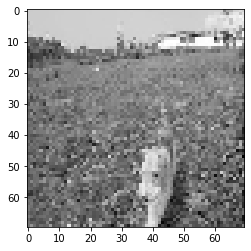

In [14]:
plt.imshow(training_data[15000][0], cmap="gray")
plt.show()

In [15]:
training_data[15000][1]

1

In [16]:
import random
random.shuffle(training_data)

In [17]:
X = []
y = []

In [18]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [19]:
X[0:2]

[array([[138, 124,  69, ...,  17,  18,  21],
        [132, 132, 105, ...,  20,  21,  27],
        [134, 129,  95, ...,  62,  69,  81],
        ...,
        [109, 110, 113, ..., 125, 124, 123],
        [104, 104, 111, ..., 119, 112, 113],
        [106, 108, 110, ..., 123, 120, 117]], dtype=uint8),
 array([[108, 108, 109, ...,  73,  31,  29],
        [109, 109, 110, ...,  70,  63,  61],
        [110, 110, 112, ...,  64,  58,  72],
        ...,
        [ 79,  86, 139, ...,  41, 105,  62],
        [ 69, 107, 144, ...,  89,  87, 110],
        [ 78, 101, 138, ..., 123,  71, 116]], dtype=uint8)]

In [20]:
y = np.array(y)

In [21]:
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [22]:
# scale data
X = X/255.0

In [23]:
pickle.dump(X, open("pkl/X.p","wb"))
pickle.dump(y, open("pkl/y.p","wb"))

In [6]:
X = pickle.load(open("pkl/X.p","rb"))
y = pickle.load(open("pkl/y.p","rb"))

In [9]:
X

array([[[[0.50196078],
         [0.51764706],
         [0.5372549 ],
         ...,
         [0.85098039],
         [0.81960784],
         [0.78039216]],

        [[0.50196078],
         [0.53333333],
         [0.54117647],
         ...,
         [0.85882353],
         [0.82352941],
         [0.79215686]],

        [[0.50588235],
         [0.54509804],
         [0.55686275],
         ...,
         [0.85882353],
         [0.83529412],
         [0.79607843]],

        ...,

        [[0.25098039],
         [0.21176471],
         [0.22352941],
         ...,
         [0.21176471],
         [0.23921569],
         [0.24313725]],

        [[0.25882353],
         [0.38823529],
         [0.23137255],
         ...,
         [0.20392157],
         [0.23137255],
         [0.21176471]],

        [[0.28235294],
         [0.30588235],
         [0.30980392],
         ...,
         [0.27058824],
         [0.20784314],
         [0.23137255]]],


       [[[0.58823529],
         [0.54901961],
         [0.56

### Modelling

In [24]:
dense_layers = [1, 2]
neuron_numbers = [32, 64]
hidden_layers =[1, 2]

for dense_layer in dense_layers:
    for neuron_number in neuron_numbers:
        for hidden_layer in hidden_layers:
            name = "{}-hidd-{}-neur-{}-dens".format(hidden_layer, neuron_number, dense_layer)
            tensor_borad = TensorBoard(log_dir='log\\{}'.format(name))
            print(name)
            model = Sequential()
            # feature learning starts here - first hidden layer
            model.add(Conv2D(neuron_number, (3,3), input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            # additional hidden layers are assigned in the loop below
            for l in range(hidden_layer-1):
                model.add(Conv2D(neuron_number, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
            
            # classification process starts. 
            model.add(Flatten())
            # A fully-connected layer is now formed and the
            for l in range(dense_layer):
                model.add(Dense(neuron_number))
                model.add(Activation("relu"))
            
            # output layer
            # output layer size is 1 for binary
            model.add(Dense(1))
            #sigmoid instead of the usual softmax as the output for this problem is binary
            model.add(Activation('sigmoid')) 

            model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

            model.fit(X,y,batch_size=500, epochs=5, validation_split=0.3, callbacks=[tensor_borad])

1-hidd-32-neur-1-dens
Train on 11566 samples, validate on 4958 samples
Epoch 1/5
11566/11566 [==============================] - 20s 2ms/sample - loss: 0.6135 - accuracy: 0.6906 - val_loss: 0.3949 - val_accuracy: 0.8332
Epoch 2/5
11566/11566 [==============================] - 23s 2ms/sample - loss: 0.3209 - accuracy: 0.8708 - val_loss: 0.2631 - val_accuracy: 0.9018
Epoch 3/5
11566/11566 [==============================] - 23s 2ms/sample - loss: 0.2209 - accuracy: 0.9206 - val_loss: 0.1998 - val_accuracy: 0.9298
Epoch 4/5
11566/11566 [==============================] - 24s 2ms/sample - loss: 0.1737 - accuracy: 0.9409 - val_loss: 0.1618 - val_accuracy: 0.9417
Epoch 5/5
11566/11566 [==============================] - 25s 2ms/sample - loss: 0.1548 - accuracy: 0.9449 - val_loss: 0.2114 - val_accuracy: 0.9173
2-hidd-32-neur-1-dens
Train on 11566 samples, validate on 4958 samples
Epoch 1/5
11566/11566 [==============================] - 45s 4ms/sample - loss: 0.4881 - accuracy: 0.7551 - val_loss: 

## Save models that performed best according to TensorBoard results

In [25]:
model.save('2-hidd-32-neur-1-dens')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 2-hidd-32-neur-1-dens\assets


In [26]:
model.save('3-hidd-64-neur-1-dens')

INFO:tensorflow:Assets written to: 3-hidd-64-neur-1-dens\assets


In [47]:
# function to scale size and greyscale color of testing/prediction data
def prepare(filepath):
    img_size =70
    img_array=cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size,img_size))
    return new_array.reshape(-1,img_size,img_size,1)/255

In [29]:
model1 = tf.keras.models.load_model('3-hidd-64-neur-1-dens')

In [30]:
model2 = tf.keras.models.load_model('2-hidd-32-neur-1-dens')

In [37]:
import scipy.misc

In [ ]:
scipy.misc.

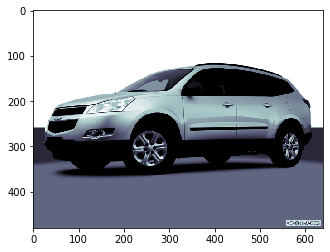

In [41]:
f1 = cv2.imread('training_data/Car/00010.jpg',  cv2.IMREAD_GRAYSCALE)
plt.imshow(f1, cmap=plt.cm.bone, # gray scale
           vmin=50, vmax=250) #contrast

In [44]:
prepare('training_data/Car/00010.jpg')

array([[[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        ...,

        [[136],
         [136],
         [136],
         ...,
         [165],
         [165],
         [139]],

        [[136],
         [136],
         [136],
         ...,
         [133],
         [211],
         [142]],

        [[136],
         [136],
         [136],
         ...,
         [136],
         [137],
         [136]]]], dtype=uint8)

In [48]:
pred1 = model1.predict([prepare('training_data/Car/00010.jpg')])
pred1

array([[0.00036828]], dtype=float32)

In [65]:
print(categories[int(round(pred1[0][0],0))])

Car


In [50]:
pred1a = model2.predict([prepare('training_data/Car/00010.jpg')])
pred1a

array([[0.00036828]], dtype=float32)

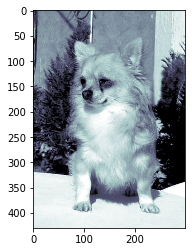

In [53]:
f2 = cv2.imread('training_data/Dog/n02085620_199.jpg', cv2.IMREAD_GRAYSCALE )
plt.imshow(f2, cmap=plt.cm.bone, # gray scale
           vmin=50, vmax=250) #contrast

In [62]:
pred2 = model1.predict([prepare('training_data/Dog/n02085620_199.jpg')])
round(pred2[0][0],0)

1.0

In [64]:
print(categories[int(round(pred2[0][0],0))])

Dog


In [66]:
pred2a = model2.predict([prepare('training_data/Dog/n02085620_199.jpg')])
pred2a

array([[0.9930842]], dtype=float32)

## Creating and Processing Testing Data

In [67]:
test_data_path = 'test_data/'

In [68]:
test_data = []
img_size =70
for cat in categories:
    path = os.path.join(test_data_path,cat)
    class_num = categories.index(cat)
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array, (img_size,img_size))
            test_data.append([new_array, class_num])
        except:
            continue

In [69]:
len(test_data)

558

In [80]:
random.shuffle(test_data)

In [81]:
X_test = []
y_test = []

In [82]:
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

In [83]:
y_test = np.array(y_test)

In [84]:
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
X_test=X_test/255

In [85]:
len(X_test), len(y_test)

(558, 558)

In [86]:
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [87]:
type(X_test[0]), type(y_test[0])

(numpy.ndarray, numpy.int32)

In [88]:
X_test[100], y_test[100]

(array([[[0.0745098 ],
         [0.0745098 ],
         [0.08235294],
         ...,
         [0.59215686],
         [0.56470588],
         [0.54117647]],
 
        [[0.45882353],
         [0.4745098 ],
         [0.4745098 ],
         ...,
         [0.58039216],
         [0.56862745],
         [0.55686275]],
 
        [[0.48235294],
         [0.48627451],
         [0.49019608],
         ...,
         [0.60392157],
         [0.63921569],
         [0.6745098 ]],
 
        ...,
 
        [[0.56078431],
         [0.58039216],
         [0.61568627],
         ...,
         [0.63137255],
         [0.62745098],
         [0.61568627]],
 
        [[0.54117647],
         [0.56470588],
         [0.6       ],
         ...,
         [0.63137255],
         [0.61960784],
         [0.61568627]],
 
        [[0.54509804],
         [0.57647059],
         [0.58823529],
         ...,
         [0.62745098],
         [0.62352941],
         [0.6       ]]]), 0)

In [89]:
test_loss, test_acc = model1.evaluate(x=X_test, y=y_test)

558/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [90]:
test_loss, test_acc = model2.evaluate(X_test, y_test)

558/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================